# Word Search II

Given an $n \times m$ `board` of characters and a list of string `words`, return _all words on the board_.

Each word must be constructed from letters of sequentially __adjacent cells__, where adjacent cells are horizontally or vertically neighboring. The same letter cell may not be used more than once in a word.

### Example 1:

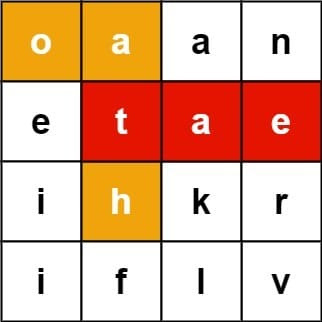

```
Input: board = [["o","a","a","n"],["e","t","a","e"],["i","h","k","r"],["i","f","l","v"]], words = ["oath","pea","eat","rain"]
Output: ["eat","oath"]
```

### Example 2:

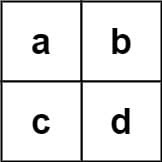

```
Input: board = [["a","b"],["c","d"]], words = ["abcb"]
Output: []
```

In [ ]:
def word_search_II(board: list[list[str]], words: list[str]) -> list[str]:
    final_words_list_result = []

    def dfs(board: list[list[str]], queue: list[tuple[int, int]], visited: list(tuple[int, int]), word: int, word_idx: int) -> bool:
        while len(queue) > 0:
            # Pop the current cell of the board
            curr_r, curr_c = queue.pop()
            # Loop through the neighbors.
            for dr, dc in [(-1, 0), (0, -1), (1, 0), (0, 1)]:
                # Compute the neighbor coordinate
                n_r = curr_r + dr
                n_c = curr_c + dc
                # Check if the new r and c are within the board boundaries
                if (n_r < 0 or n_r > len(board) - 1) or (n_c < 0 or n_c > len(board[r]) - 1):
                    continue
                # If the cell has not been visited yet, and the cell letter is equal to the letter of the current word, 
                # add it to the queue and visited
                if board[n_r][n_c] == word[word_idx] and board[n_r][n_c] not in visited:
                    # If we have found the last letter of the word, add it to the final 
                    if word_idx == len(word) - 1:
                        return True                    
                    # Otherwise add the current letter to the queue and visited 
                    queue.append((n_r, n_c))
                    visited.append((n_r, n_c))
                    # Increase for the next letter in the word
                    word_idx += 1
        return False

    # Loop through the different words 
    for word in words:
        # Now start searching withing the board the first letter of the word
        start_letter = word[0]
        queue = []
        visited = []
        word_idx = 1
        for r in range(len(board)):
            for c in range(len(board[r])):
                # Check if it is equal to the start letter:
                if board[r][c] == start_letter:
                    # Now start the BFS search
                    queue.append((r, c))
                    visited.append((r, c))

                    found = dfs(board, queue, visited, word, word_idx)

                    if found:
                        final_words_list_result.append(word)

    return final_words_list_result


board = [
    ["o","a","a","n"],
    ["e","t","a","e"],
    ["i","h","k","r"],
    ["i","f","l","v"]
]

words = ["oath","pea","eat","rain"]

print(word_search_II(board, words))

board = [
    ["a","b"],
    ["c","d"]
]

words = ["abcb"]

print(word_search_II(board, words))

['oath', 'eat']
[]


## Solution

To solve this problem, we'll use a __Trie__ data structure to efficiently store and search words. Then, we'll use __depth-first search (DFS)__ to explore the board and find words that exist in the Trie. 

Trie will help up quickly prune our search when a prefix doesn't exist in any word. This reduces unnecessary exploration. 

Here are the steps:

1. Build a Trie from the from the input words.

2. For each cell in the board, start a depth-first search.

3. During the search, track the current word and checks if it exists in the Trie. 

4. If a complete word is found, add the result

Time complexity will be $O(m \times n \times 4^L)$, where $m$ and $n$ are board dimensions, and $L$ is the maximum word length. Space complexity is `O(total characters in words)`

In [ ]:
def findWords(board, words):
    # Trie Node class to build our prefix tree
    class TrieNode:
        def __init__(self):
            self.children = {}
            self.is_word = False
    
    # Build Trie from words
    def build_trie(words):
        root = TrieNode() 
        for word in words:
            node = root
            for char in words:
                if char not in node.children:
                    node.children[char] = TrieNode()
                node = node.children[char]
            node.is_word = True
        return root

    # DFS to explore board and find words
    def dfs(row, col, node, word):
        # Check board boundaries and current character
        if (row < 0 or row >= len(board) or
            col < 0 or col >= len(board[0]) or
            board[row][col] not in node.children):
            return

        # Save current character and mark as visited
        char = board[row][col]
        curr_node = node.children[char]
        word += char

        # If current path forms a complete word
        if curr_node.is_word:
            result.add(word)
            curr_node.is_word = False   # Avoid duplicates

        # Mark current cell as visited
        board[row][col] = '#'

        # Explore four directions
        dfs(row+1, col, curr_node, word)
        dfs(row-1, col, curr_node, word)
        dfs(row, col+1, curr_node, word)
        dfs(row, col-1, curr_node, word)

        # Restore the board
        board[row][col] = char
    
    # Main solution logic
    result = set()
    root = build_trie(words)

    # Start DFS from each cell
    for r in range(len(board)):
        for c in range(len(board[0])):
            dfs(r, c, root, '')

    return list(result)

board = [
    ["o","a","a","n"],
    ["e","t","a","e"],
    ["i","h","k","r"],
    ["i","f","l","v"]
]

words = ["oath","pea","eat","rain"]

print(findWords(board, words))

board = [
    ["a","b"],
    ["c","d"]
]

words = ["abcb"]

print(findWords(board, words))

set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
[]
set()
set()
set()
set()
[]
